In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x_oders = pd.read_excel('Company X - Order Report.xlsx')
x_pincodes = pd.read_excel('Company X - Pincode Zones.xlsx')
x_skq = pd.read_excel('Company X - SKU Master.xlsx')
c_invoice = pd.read_excel('Courier Company - Invoice.xlsx')
c_rates = pd.read_excel('Courier Company - Rates.xlsx')

In [3]:
x_oders.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [4]:
x_oders.rename(columns={'ExternOrderNo':'Order ID'},inplace=True)

In [5]:
x_pincodes.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [6]:
x_skq.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [7]:
c_rates.head()

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


In [8]:
c_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [9]:
# joining dataframes
df = x_oders.merge(c_invoice,on='Order ID')[['Order ID','SKU','AWB Code','Zone','Type of Shipment']]

In [10]:
df = df.merge(x_skq,on='SKU')

In [11]:
#converting gram into kg
df['Weight (kg)'] = np.round(df['Weight (g)'] / 1000, decimals=2)

In [12]:
df

,Order ID,SKU,AWB Code,Zone,Type of Shipment,Weight (g),Weight (kg)
0,2001827036,8904223818706,1091122418320,b,Forward charges,127,0.13
1,2001821995,8904223818706,1091121183730,d,Forward charges,127,0.13
2,2001819252,8904223818706,1091120352712,b,Forward charges,127,0.13
3,2001816996,8904223818706,1091119429202,d,Forward charges,127,0.13
4,2001814580,8904223818706,1091118925110,d,Forward and RTO charges,127,0.13
...,...,...,...,...,...,...,...
396,2001806616,8904223819123,1091117225484,b,Forward charges,250,0.25
397,2001806567,8904223815804,1091117224902,d,Forward charges,160,0.16
398,2001806567,8904223818577,1091117224902,d,Forward charges,150,0.15
399,2001806408,8904223819437,1091117222931,d,Forward charges,552,0.55


In [13]:
# grouping data to calculate total weight as per order id
df = df.groupby(['Order ID','Zone','Type of Shipment','AWB Code']).sum('Weight (kg)').reset_index()

In [14]:
df = pd.DataFrame(df)

In [15]:
df['Weight (kg)'] = np.round(df['Weight (kg)'], decimals=2)

In [16]:
df.head()

,Order ID,Zone,Type of Shipment,AWB Code,Weight (g),Weight (kg)
0,2001806210,b,Forward charges,1091117221940,220,0.22
1,2001806226,d,Forward charges,1091117222065,240,0.24
2,2001806229,d,Forward charges,1091117222080,500,0.50
3,2001806232,d,Forward charges,1091117222124,377,0.38
4,2001806233,b,Forward charges,1091117222135,245,0.25


In [17]:
c_rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


In [18]:
# creating new column for get zone wise slab value
df['slab rates'] = df['Zone'].replace({'b':0.50, 'd':1.25, 'e':1.50})

In [19]:
df

,Order ID,Zone,Type of Shipment,AWB Code,Weight (g),Weight (kg),slab rates
0,2001806210,b,Forward charges,1091117221940,220,0.22,0.50
1,2001806226,d,Forward charges,1091117222065,240,0.24,1.25
2,2001806229,d,Forward charges,1091117222080,500,0.50,1.25
3,2001806232,d,Forward charges,1091117222124,377,0.38,1.25
4,2001806233,b,Forward charges,1091117222135,245,0.25,0.50
...,...,...,...,...,...,...,...
119,2001821995,d,Forward charges,1091121183730,477,0.48,1.25
120,2001822466,d,Forward charges,1091121305541,352,0.35,1.25
121,2001823564,d,Forward and RTO charges,1091121666133,336,0.33,1.25
122,2001825261,d,Forward and RTO charges,1091121981575,611,0.61,1.25


In [20]:
#giving conditons to if-else statements to fing X slab
l = []
for (i,r) in df.iterrows(): 
    if r['slab rates'] >= r['Weight (kg)']:
        l.append(r['slab rates'])
    elif r['slab rates'] * 2 >= r['Weight (kg)']:
        l.append(r['slab rates'] *2)
    elif r['slab rates'] * 3 >= r['Weight (kg)']:
        l.append(r['slab rates'] *3)
    elif r['slab rates'] * 4 >= r['Weight (kg)']:
        l.append(r['slab rates'] *4)
    elif r['slab rates'] * 5 >= r['Weight (kg)']:
        l.append(r['slab rates'] *5)

In [21]:
df['x_slab']= l

In [22]:
df

,Order ID,Zone,Type of Shipment,AWB Code,Weight (g),Weight (kg),slab rates,x_slab
0,2001806210,b,Forward charges,1091117221940,220,0.22,0.50,0.50
1,2001806226,d,Forward charges,1091117222065,240,0.24,1.25,1.25
2,2001806229,d,Forward charges,1091117222080,500,0.50,1.25,1.25
3,2001806232,d,Forward charges,1091117222124,377,0.38,1.25,1.25
4,2001806233,b,Forward charges,1091117222135,245,0.25,0.50,0.50
...,...,...,...,...,...,...,...,...
119,2001821995,d,Forward charges,1091121183730,477,0.48,1.25,1.25
120,2001822466,d,Forward charges,1091121305541,352,0.35,1.25,1.25
121,2001823564,d,Forward and RTO charges,1091121666133,336,0.33,1.25,1.25
122,2001825261,d,Forward and RTO charges,1091121981575,611,0.61,1.25,1.25


In [23]:
# join the invoice dataframe to get some imports columns 
df1 = df.merge(c_invoice,on='Order ID')

In [24]:
#removing unwanted colums
df1.drop(columns=['AWB Code_y','Warehouse Pincode','Customer Pincode','Type of Shipment_y',
                  'Weight (g)'],inplace=True)

In [25]:
df1.head()

,Order ID,Zone_x,Type of Shipment_x,AWB Code_x,Weight (kg),slab rates,x_slab,Charged Weight,Zone_y,Billing Amount (Rs.)
0,2001806210,b,Forward charges,1091117221940,0.22,0.50,0.50,2.92,b,174.5
1,2001806226,d,Forward charges,1091117222065,0.24,1.25,1.25,0.68,d,90.2
2,2001806229,d,Forward charges,1091117222080,0.50,1.25,1.25,0.71,d,90.2
3,2001806232,d,Forward charges,1091117222124,0.38,1.25,1.25,1.30,d,135.0
4,2001806233,b,Forward charges,1091117222135,0.25,0.50,0.50,0.78,b,61.3


In [26]:
#giving conditons to if-else statements to find y slab
l = []
for (i,r) in df1.iterrows(): 
    if r['slab rates'] >= r['Charged Weight']:
        l.append(r['slab rates'])
    elif r['slab rates'] * 2 >= r['Charged Weight']:
        l.append(r['slab rates'] *2)
    elif r['slab rates'] * 3 >= r['Charged Weight']:
        l.append(r['slab rates'] *3)
    elif r['slab rates'] * 4 >= r['Charged Weight']:
        l.append(r['slab rates'] *4)
    elif r['slab rates'] * 5 >= r['Charged Weight']:
        l.append(r['slab rates'] *5)
    elif r['slab rates'] * 6 >= r['Charged Weight']:
        l.append(r['slab rates'] *6)
    elif r['slab rates'] * 7 >= r['Charged Weight']:
        l.append(r['slab rates'] *7)


In [27]:
max(l)

5.0

In [28]:
df1['y_slab'] =l

In [29]:
df1

,Order ID,Zone_x,Type of Shipment_x,AWB Code_x,Weight (kg),slab rates,x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab
0,2001806210,b,Forward charges,1091117221940,0.22,0.50,0.50,2.92,b,174.5,3.00
1,2001806226,d,Forward charges,1091117222065,0.24,1.25,1.25,0.68,d,90.2,1.25
2,2001806229,d,Forward charges,1091117222080,0.50,1.25,1.25,0.71,d,90.2,1.25
3,2001806232,d,Forward charges,1091117222124,0.38,1.25,1.25,1.30,d,135.0,2.50
4,2001806233,b,Forward charges,1091117222135,0.25,0.50,0.50,0.78,b,61.3,1.00
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,d,Forward charges,1091121183730,0.48,1.25,1.25,0.50,d,45.4,1.25
120,2001822466,d,Forward charges,1091121305541,0.35,1.25,1.25,1.10,d,135.0,1.25
121,2001823564,d,Forward and RTO charges,1091121666133,0.33,1.25,1.25,0.70,d,172.8,1.25
122,2001825261,d,Forward and RTO charges,1091121981575,0.61,1.25,1.25,1.60,d,345.0,2.50


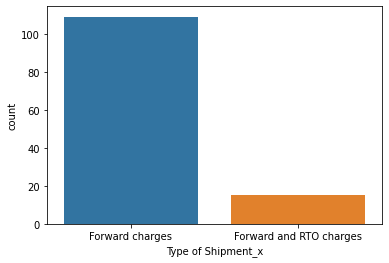

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment_x, dtype: int64


In [30]:
sns.countplot(x=df1['Type of Shipment_x'])
plt.show()
print(df1['Type of Shipment_x'].value_counts())

In [31]:
df1

,Order ID,Zone_x,Type of Shipment_x,AWB Code_x,Weight (kg),slab rates,x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab
0,2001806210,b,Forward charges,1091117221940,0.22,0.50,0.50,2.92,b,174.5,3.00
1,2001806226,d,Forward charges,1091117222065,0.24,1.25,1.25,0.68,d,90.2,1.25
2,2001806229,d,Forward charges,1091117222080,0.50,1.25,1.25,0.71,d,90.2,1.25
3,2001806232,d,Forward charges,1091117222124,0.38,1.25,1.25,1.30,d,135.0,2.50
4,2001806233,b,Forward charges,1091117222135,0.25,0.50,0.50,0.78,b,61.3,1.00
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,d,Forward charges,1091121183730,0.48,1.25,1.25,0.50,d,45.4,1.25
120,2001822466,d,Forward charges,1091121305541,0.35,1.25,1.25,1.10,d,135.0,1.25
121,2001823564,d,Forward and RTO charges,1091121666133,0.33,1.25,1.25,0.70,d,172.8,1.25
122,2001825261,d,Forward and RTO charges,1091121981575,0.61,1.25,1.25,1.60,d,345.0,2.50


In [32]:
c_rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.25,29.5,23.6,13.6,23.6
1,B,0.50,33.0,28.3,20.5,28.3
2,C,0.75,40.1,38.9,31.9,38.9
3,D,1.25,45.4,44.8,41.3,44.8
4,E,1.50,56.6,55.5,50.7,55.5


In [33]:
#join rates dataframe to get all rates 
df1 = df1.merge(c_rates,left_on='slab rates',right_on='Weight Slabs')

In [34]:
df1.drop(columns=['Zone','Weight Slabs'],inplace=True)

In [35]:
df1.head()

,Order ID,Zone_x,Type of Shipment_x,AWB Code_x,Weight (kg),slab rates,x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,2001806210,b,Forward charges,1091117221940,0.22,0.5,0.5,2.92,b,174.5,3.0,33.0,28.3,20.5,28.3
1,2001806233,b,Forward charges,1091117222135,0.25,0.5,0.5,0.78,b,61.3,1.0,33.0,28.3,20.5,28.3
2,2001806458,b,Forward charges,1091117223244,0.70,0.5,1.0,1.00,b,61.3,1.0,33.0,28.3,20.5,28.3
3,2001806547,b,Forward charges,1091117224611,0.13,0.5,0.5,1.00,b,61.3,1.0,33.0,28.3,20.5,28.3
4,2001806575,b,Forward charges,1091117225016,0.50,0.5,0.5,0.68,b,61.3,1.0,33.0,28.3,20.5,28.3


In [36]:
#for calculating company expected charge
l = []
for (i,r) in df1.iterrows(): 
    if np.round(r['Weight (kg)']/r['x_slab']) == 0 and r['Type of Shipment_x']=='Forward charges':
        l.append(r['Forward Fixed Charge'])
    elif np.round(r['Weight (kg)']/r['x_slab']) > 0 and r['Type of Shipment_x']=='Forward charges':
        l.append(r['Forward Fixed Charge'] + r['Forward Additional Weight Slab Charge']*(r['Weight (kg)']/r['x_slab'] - 1))
    elif np.round(r['Weight (kg)']/r['x_slab']) == 0 and r['Type of Shipment_x']=='Forward and RTO charges':
        l.append(r['Forward Fixed Charge']+r['RTO Fixed Charge'])
    elif np.round(r['Weight (kg)']/r['x_slab']) > 0 and r['Type of Shipment_x']=='Forward and RTO charges':
        l.append(r['RTO Fixed Charge']+r['Forward Fixed Charge']+ r['RTO Additional Weight Slab Charge']*(r['Weight (kg)']/r['x_slab'] - 1))


In [37]:
l = np.round(l,decimals=1)

In [38]:
df1['Expected Charge x'] = l

In [39]:
df1.head()

,Order ID,Zone_x,Type of Shipment_x,AWB Code_x,Weight (kg),slab rates,x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge,Expected Charge x
0,2001806210,b,Forward charges,1091117221940,0.22,0.5,0.5,2.92,b,174.5,3.0,33.0,28.3,20.5,28.3,33.0
1,2001806233,b,Forward charges,1091117222135,0.25,0.5,0.5,0.78,b,61.3,1.0,33.0,28.3,20.5,28.3,33.0
2,2001806458,b,Forward charges,1091117223244,0.70,0.5,1.0,1.00,b,61.3,1.0,33.0,28.3,20.5,28.3,24.5
3,2001806547,b,Forward charges,1091117224611,0.13,0.5,0.5,1.00,b,61.3,1.0,33.0,28.3,20.5,28.3,33.0
4,2001806575,b,Forward charges,1091117225016,0.50,0.5,0.5,0.68,b,61.3,1.0,33.0,28.3,20.5,28.3,33.0


In [40]:
#droping unwanted columns
df1.drop(columns=['slab rates','Type of Shipment_x','Forward Fixed Charge',
                  'Forward Additional Weight Slab Charge','RTO Fixed Charge',
                  'RTO Additional Weight Slab Charge'],inplace=True)

In [41]:
df1.head()

,Order ID,Zone_x,AWB Code_x,Weight (kg),x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab,Expected Charge x
0,2001806210,b,1091117221940,0.22,0.5,2.92,b,174.5,3.0,33.0
1,2001806233,b,1091117222135,0.25,0.5,0.78,b,61.3,1.0,33.0
2,2001806458,b,1091117223244,0.70,1.0,1.00,b,61.3,1.0,24.5
3,2001806547,b,1091117224611,0.13,0.5,1.00,b,61.3,1.0,33.0
4,2001806575,b,1091117225016,0.50,0.5,0.68,b,61.3,1.0,33.0


In [42]:
#calculating difference between conpany x charge and courier campany charge
df1['Difference_billind_enpected'] = df1['Billing Amount (Rs.)']-df1['Expected Charge x']

In [43]:
df1.head()

,Order ID,Zone_x,AWB Code_x,Weight (kg),x_slab,Charged Weight,Zone_y,Billing Amount (Rs.),y_slab,Expected Charge x,Difference_billind_enpected
0,2001806210,b,1091117221940,0.22,0.5,2.92,b,174.5,3.0,33.0,141.5
1,2001806233,b,1091117222135,0.25,0.5,0.78,b,61.3,1.0,33.0,28.3
2,2001806458,b,1091117223244,0.70,1.0,1.00,b,61.3,1.0,24.5,36.8
3,2001806547,b,1091117224611,0.13,0.5,1.00,b,61.3,1.0,33.0,28.3
4,2001806575,b,1091117225016,0.50,0.5,0.68,b,61.3,1.0,33.0,28.3


In [44]:
#rename columns name
df1.rename({'AWB Code_x':'AWB Code','Weight (kg)':'X Total wight','x_slab':'X weight slab',
           'Charged Weight':'C Total wight','y_slab':'C weight slab','Zone_y':'Zone_c',
            'Billing Amount (Rs.)':'Charges Billed by C',
            'Difference_billind_enpected':'Diff C & X'},axis=1, inplace=True)

In [45]:
df1.head()

,Order ID,Zone_x,AWB Code,X Total wight,X weight slab,C Total wight,Zone_c,Charges Billed by C,C weight slab,Expected Charge x,Diff C & X
0,2001806210,b,1091117221940,0.22,0.5,2.92,b,174.5,3.0,33.0,141.5
1,2001806233,b,1091117222135,0.25,0.5,0.78,b,61.3,1.0,33.0,28.3
2,2001806458,b,1091117223244,0.70,1.0,1.00,b,61.3,1.0,24.5,36.8
3,2001806547,b,1091117224611,0.13,0.5,1.00,b,61.3,1.0,33.0,28.3
4,2001806575,b,1091117225016,0.50,0.5,0.68,b,61.3,1.0,33.0,28.3


In [46]:
#for rearange columns 
columns = ['Order ID','AWB Code','X Total wight','X weight slab','C Total wight','C weight slab',
          'Zone_x','Zone_c','Expected Charge x','Charges Billed by C','Diff C & X']

In [47]:
company_x = df1[columns]

In [48]:
company_x.head()

,Order ID,AWB Code,X Total wight,X weight slab,C Total wight,C weight slab,Zone_x,Zone_c,Expected Charge x,Charges Billed by C,Diff C & X
0,2001806210,1091117221940,0.22,0.5,2.92,3.0,b,b,33.0,174.5,141.5
1,2001806233,1091117222135,0.25,0.5,0.78,1.0,b,b,33.0,61.3,28.3
2,2001806458,1091117223244,0.70,1.0,1.00,1.0,b,b,24.5,61.3,36.8
3,2001806547,1091117224611,0.13,0.5,1.00,1.0,b,b,33.0,61.3,28.3
4,2001806575,1091117225016,0.50,0.5,0.68,1.0,b,b,33.0,61.3,28.3


In [49]:
company_x.to_csv('companyX')